# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
import sys
sys.path.append('C:/Users/pasin/OneDrive/Desktop/ALHW/python_api_challenge')
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | namsos
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | polyarnyy
Processing Record 4 of Set 1 | lodja
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | shingu
Processing Record 9 of Set 1 | atafu village
Processing Record 10 of Set 1 | grande prairie
Processing Record 11 of Set 1 | wailua homesteads
Processing Record 12 of Set 1 | klyuchi
Processing Record 13 of Set 1 | taro
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | fale old settlement
Processing Record 16 of Set 1 | infantes
Processing Record 17 of Set 1 | moose jaw
Processing Record 18 of Set 1 | olonkinbyen
Processing Record 19 of Set 1 | tevriz
Processing Record 20 of Set 1 | puerto ayacucho
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | vargem grande
P

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,namsos,64.4662,11.4957,-1.97,74,48,4.63,NO,1702244876
1,thompson,55.7435,-97.8558,-15.91,85,75,1.03,CA,1702244784
2,polyarnyy,69.1989,33.4478,-11.80,86,97,8.25,RU,1702244876
3,lodja,-3.4833,23.4333,21.47,96,100,0.40,CD,1702244876
4,port elizabeth,-33.9180,25.5701,15.73,91,0,1.03,ZA,1702244877


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namsos,64.4662,11.4957,-1.97,74,48,4.63,NO,1702244876
1,thompson,55.7435,-97.8558,-15.91,85,75,1.03,CA,1702244784
2,polyarnyy,69.1989,33.4478,-11.80,86,97,8.25,RU,1702244876
3,lodja,-3.4833,23.4333,21.47,96,100,0.40,CD,1702244876
4,port elizabeth,-33.9180,25.5701,15.73,91,0,1.03,ZA,1702244877


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

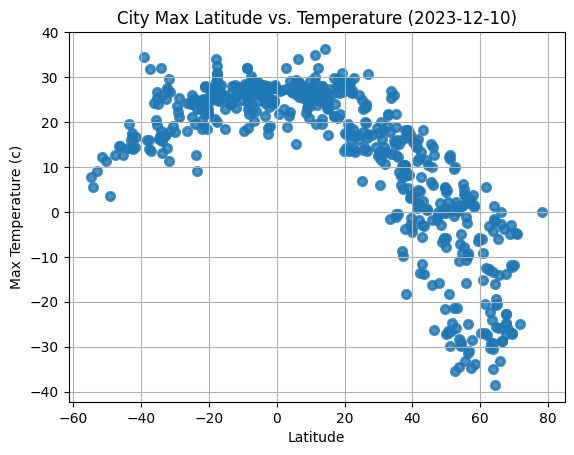

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    linewidths=2,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

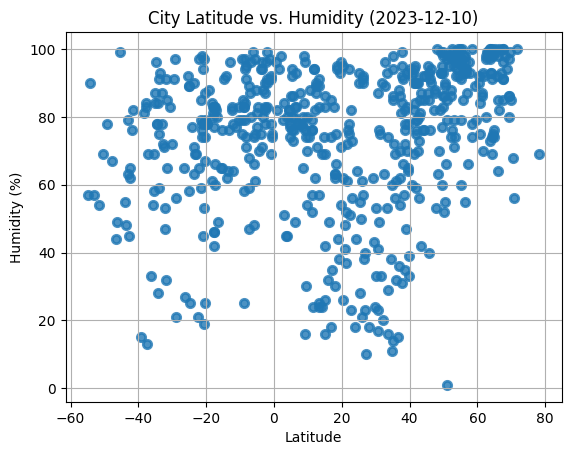

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    linewidths=2,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

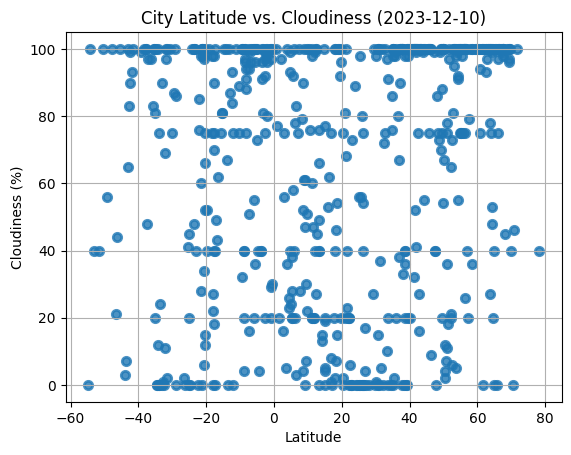

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    linewidths=2,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

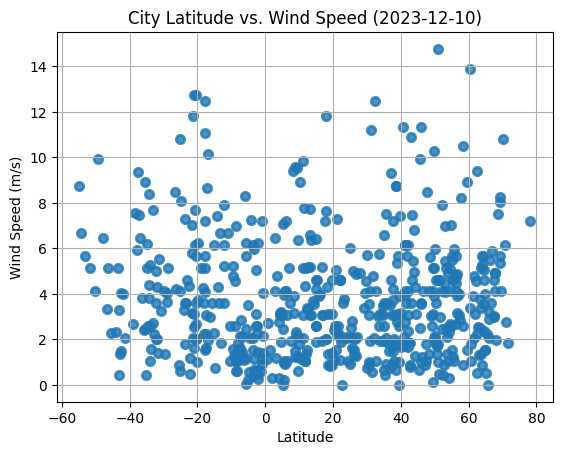

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    linewidths=2, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,namsos,64.4662,11.4957,-1.97,74,48,4.63,NO,1702244876
1,thompson,55.7435,-97.8558,-15.91,85,75,1.03,CA,1702244784
2,polyarnyy,69.1989,33.4478,-11.80,86,97,8.25,RU,1702244876
7,shingu,33.7333,135.9833,12.86,74,91,1.93,JP,1702244877
9,grande prairie,55.1667,-118.8027,4.10,60,75,5.66,CA,1702244849


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,lodja,-3.4833,23.4333,21.47,96,100,0.40,CD,1702244876
4,port elizabeth,-33.9180,25.5701,15.73,91,0,1.03,ZA,1702244877
5,hermanus,-34.4187,19.2345,16.95,78,0,4.40,ZA,1702244877
6,ushuaia,-54.8000,-68.3000,7.81,57,0,8.75,AR,1702244833
8,atafu village,-8.5421,-172.5159,28.53,79,96,6.98,TK,1702244878


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7129080173335014


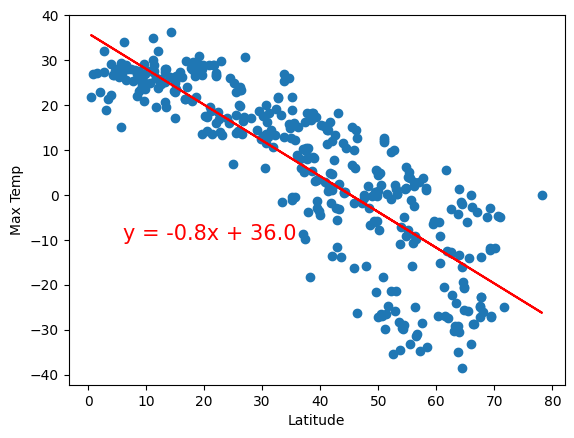

In [33]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(6,-10))

The r-value is: 0.3963483356862628


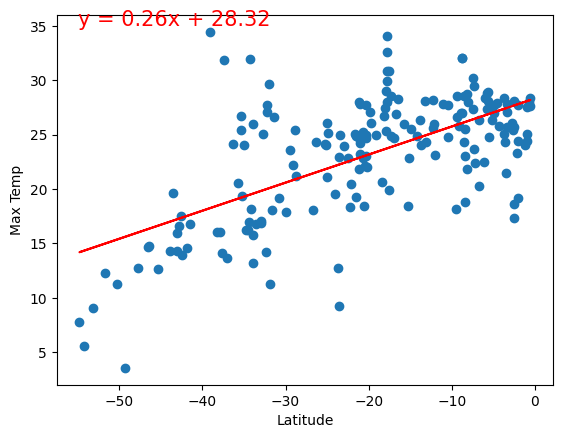

In [34]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1203025079200899


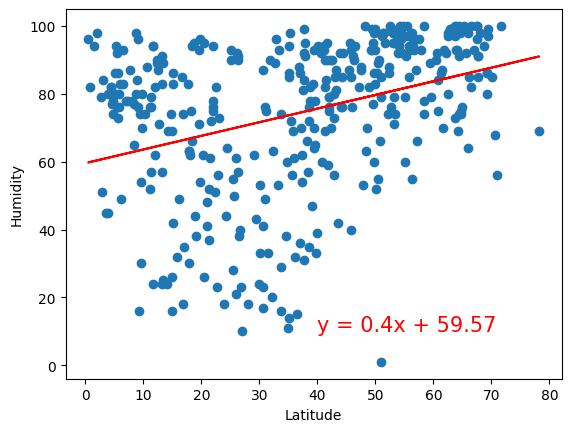

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(40,10))

The r-value is: 0.09522251709106602


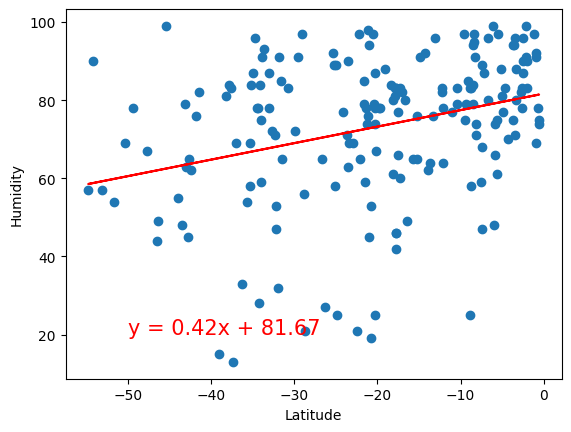

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.11491590465221764


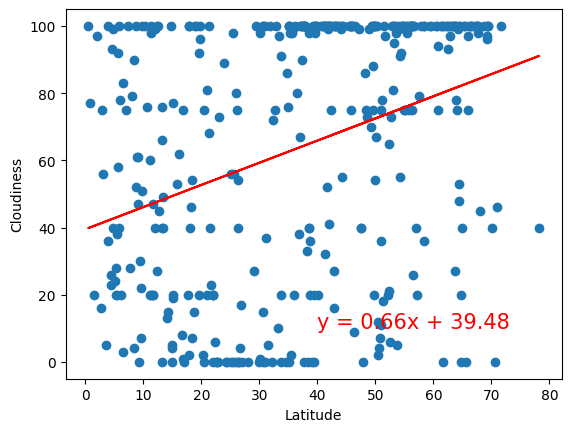

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,10))

The r-value is: 0.01984950799205453


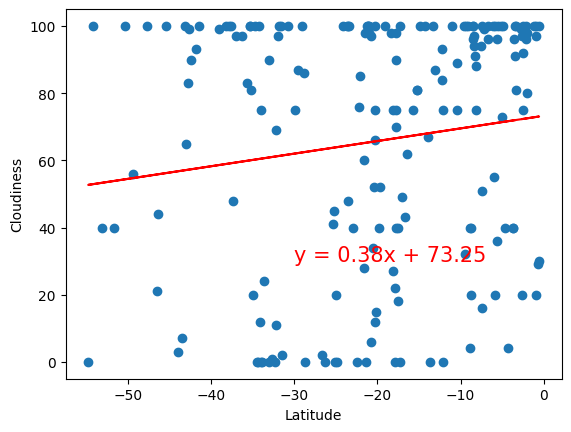

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.010758712121533967


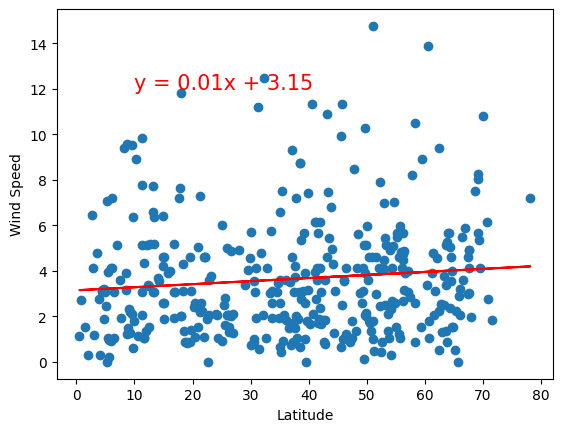

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (10,12))

The r-value is: 0.05967572447604733


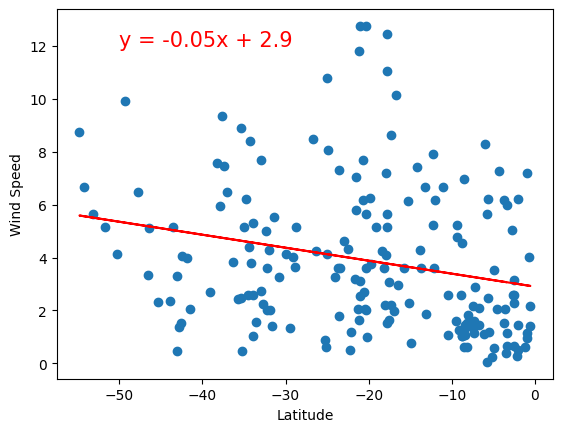

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** Thre is no correlation between the wind speed and latitude. There is not much difference between hemispheres. 